In [53]:
!pip install catboost

In [54]:
import os
import re
import gc
from tqdm import tqdm
from datetime import date     #calculating age
from datetime import datetime #converting string to date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.metrics import (accuracy_score, precision_score, recall_score, balanced_accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay)

In [55]:
df = pd.read_csv(r"/content/train.csv")

In [56]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [59]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [61]:
df.columns = df.columns.str.replace('.', '_',regex = False)

In [62]:
df.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [63]:
df.shape

(233154, 41)

In [64]:
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [65]:
df['Employment_Type'].fillna(df['Employment_Type'].mode()[0],inplace = True)

In [66]:
df.isna().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

In [67]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [68]:
df['Employment_Type'].unique()

array(['Salaried', 'Self employed'], dtype=object)

In [69]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

UniqueID : [420825 537409 417566 ... 613658 548084 630213]
disbursed_amount : [50578 47145 53278 ... 61456 51406 34259]
asset_cost : [ 58400  65550  61360 ...  45233  52965 116009]
ltv : [89.55 73.23 89.63 ... 33.32 32.53 33.82]
branch_id : [ 67  78  34 130  74  11   5  20  63  48  79   3  42 142  36  16 146 147
  65   9   1 152  29  10  70  19   7  85  61  17   8 153  18 162  68  72
  64   2 160 251 103 104 120 136  77  13 138 135  73 248  15 165  62  76
 105 249 250 255 254  82 158 159 117 202 259 207  35  69  97  43 257 258
 260 111  66 261 101  14 121 217  84 100]
supplier_id : [22807 22744 17014 ... 23618 22289 24031]
manufacturer_id : [ 45  86  48  51 120  49 145  67 153 156 152]
Current_pincode_ID : [1441 1502 1497 ... 3586  680  693]
Date_of_Birth : ['01-01-84' '31-07-85' '24-08-85' ... '24-03-62' '23-07-66' '08-12-62']
Employment_Type : ['Salaried' 'Self employed']
DisbursalDate : ['03-08-18' '26-09-18' '01-08-18' '26-10-18' '19-09-18' '23-09-18'
 '16-09-18' '05-09-18' '29-09-

In [70]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [72]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [73]:
df[['AVERAGE_ACCT_AGE']]

,AVERAGE_ACCT_AGE
0,0yrs 0mon
1,1yrs 11mon
2,0yrs 0mon
3,0yrs 8mon
4,0yrs 0mon
...,...
233149,1yrs 9mon
233150,0yrs 6mon
233151,0yrs 0mon
233152,0yrs 0mon


In [74]:
# function to change age string to number of months
def time_to_months(age):
  age_year, age_month  = age.split(' ')
  age_year = int(age_year.replace('yrs', ''))
  age_month = int(age_month.replace('mon', ''))
  return age_year * 12 + age_month

In [75]:
df['AVERAGE_ACCT_AGE'][0]

'0yrs 0mon'

In [76]:
df['AVERAGE_ACCT_AGE_MONTHS'] = df['AVERAGE_ACCT_AGE'].apply(time_to_months)

In [77]:
df['CREDIT_HISTORY_LENGTH_MONTHS'] = df['CREDIT_HISTORY_LENGTH'].apply(time_to_months)

In [ ]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,23,23
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,8,15
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [ ]:
df[['PERFORM_CNS_SCORE_DESCRIPTION','DisbursalDate','Date_of_Birth']]

,PERFORM_CNS_SCORE_DESCRIPTION,DisbursalDate,Date_of_Birth
0,No Bureau History Available,03-08-18,01-01-84
1,I-Medium Risk,26-09-18,31-07-85
2,No Bureau History Available,01-08-18,24-08-85
3,L-Very High Risk,26-10-18,30-12-93
4,No Bureau History Available,26-09-18,09-12-77
...,...,...,...
233149,D-Very Low Risk,26-10-18,01-08-88
233150,A-Very Low Risk,23-10-18,05-12-88
233151,No Bureau History Available,24-10-18,01-06-76
233152,No Bureau History Available,29-09-18,26-03-94


In [ ]:
for i in df['PERFORM_CNS_SCORE_DESCRIPTION'].unique():
    print(i)

No Bureau History Available
I-Medium Risk
L-Very High Risk
A-Very Low Risk
Not Scored: Not Enough Info available on the customer
D-Very Low Risk
M-Very High Risk
B-Very Low Risk
C-Very Low Risk
E-Low Risk
H-Medium Risk
F-Low Risk
K-High Risk
Not Scored: No Activity seen on the customer (Inactive)
Not Scored: Sufficient History Not Available
Not Scored: No Updates available in last 36 months
G-Low Risk
J-High Risk
Not Scored: Only a Guarantor
Not Scored: More than 50 active Accounts found


In [ ]:
def risk_category(i):
    if 'Risk' in i:
        alphab, risk_status  = i.split('-')
        alphab = ''
        return risk_status + ''
    elif 'Not Scored' in i:
        ff, gh  = i.split(': ')
        gh = ''
        return ff + ''
    else:
        return i

In [ ]:
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].apply(risk_category)

In [ ]:
df[['PERFORM_CNS_SCORE_DESCRIPTION']].head(30)

,PERFORM_CNS_SCORE_DESCRIPTION
0,No Bureau History Available
1,Medium Risk
2,No Bureau History Available
3,Very High Risk
4,No Bureau History Available
5,Very Low Risk
6,No Bureau History Available
7,Not Scored
8,Very Low Risk
9,Very Low Risk


In [ ]:
for i in df['PERFORM_CNS_SCORE_DESCRIPTION'].unique():
    print(i)

No Bureau History Available
Medium Risk
Very High Risk
Very Low Risk
Not Scored
Low Risk
High Risk


In [ ]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

PERFORM_CNS_SCORE_DESCRIPTION
No Bureau History Available    116950
Very Low Risk                   50728
Low Risk                        18294
Not Scored                      12835
Medium Risk                     12412
High Risk                       12025
Very High Risk                   9910
Name: count, dtype: int64

In [ ]:
df["loan_default"].value_counts()

loan_default
0    182543
1     50611
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      233154 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [ ]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date_of_Birth                           15433
Employment_Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION               7
PRI_NO_OF_ACCTS                   

In [ ]:
df['Date_of_Birth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 233154 entries, 0 to 233153
Series name: Date_of_Birth
Non-Null Count   Dtype 
--------------   ----- 
233154 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [ ]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,23,23
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,8,15
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,...,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0,21,39
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,...,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0,6,6
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0


In [ ]:
# plt.figure(figsize=(30,20))
# sns.heatmap(df.corr())
# plt.show()

In [ ]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format = 'mixed')

In [ ]:
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format = 'mixed')
current_date = pd.to_datetime('today')

In [ ]:
df['Age'] = (current_date - df['Date_of_Birth']).dt.days // 365

In [ ]:
df['Age']

0         40
1         39
2         38
3         30
4         46
          ..
233149    36
233150    36
233151    48
233152    30
233153    40
Name: Age, Length: 233154, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date_of_Birth                        233154 non-null  datetime64[ns]
 9   Employment_Type                      233154 non-null  object        
 

In [ ]:
df = df.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH','MobileNo_Avl_Flag','Date_of_Birth'], axis=1)

In [ ]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment_Type,DisbursalDate,...,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,loan_default,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,Age
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,2018-03-08,...,0,0,0,0,0,0,0,0,0,40
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,2018-09-26,...,0,1991,0,0,1,0,1,23,23,39
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,2018-01-08,...,0,0,0,0,0,0,0,0,0,38
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,2018-10-26,...,0,31,0,0,0,1,1,8,15,30
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,2018-09-26,...,0,0,0,0,0,1,1,0,0,46


In [ ]:
df['Employment_Type'].unique()

array(['Salaried', 'Self employed'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Employment_Type                      233154 non-null  object        
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

In [ ]:
df.shape

(233154, 40)

In [ ]:
PSCORE_DESCRIPTION_encoder = LabelEncoder()
PSCORE_DESCRIPTION_encoder.fit(df['PERFORM_CNS_SCORE_DESCRIPTION'])
df['PERFORM_CNS_SCORE_DESCRIPTION'] = PSCORE_DESCRIPTION_encoder.transform(df['PERFORM_CNS_SCORE_DESCRIPTION'])

In [ ]:
Employment_Type_encoder = LabelEncoder()
Employment_Type_encoder.fit(df['Employment_Type'])
df['Employment_Type'] = Employment_Type_encoder.transform(df['Employment_Type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Employment_Type                      233154 non-null  int64         
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

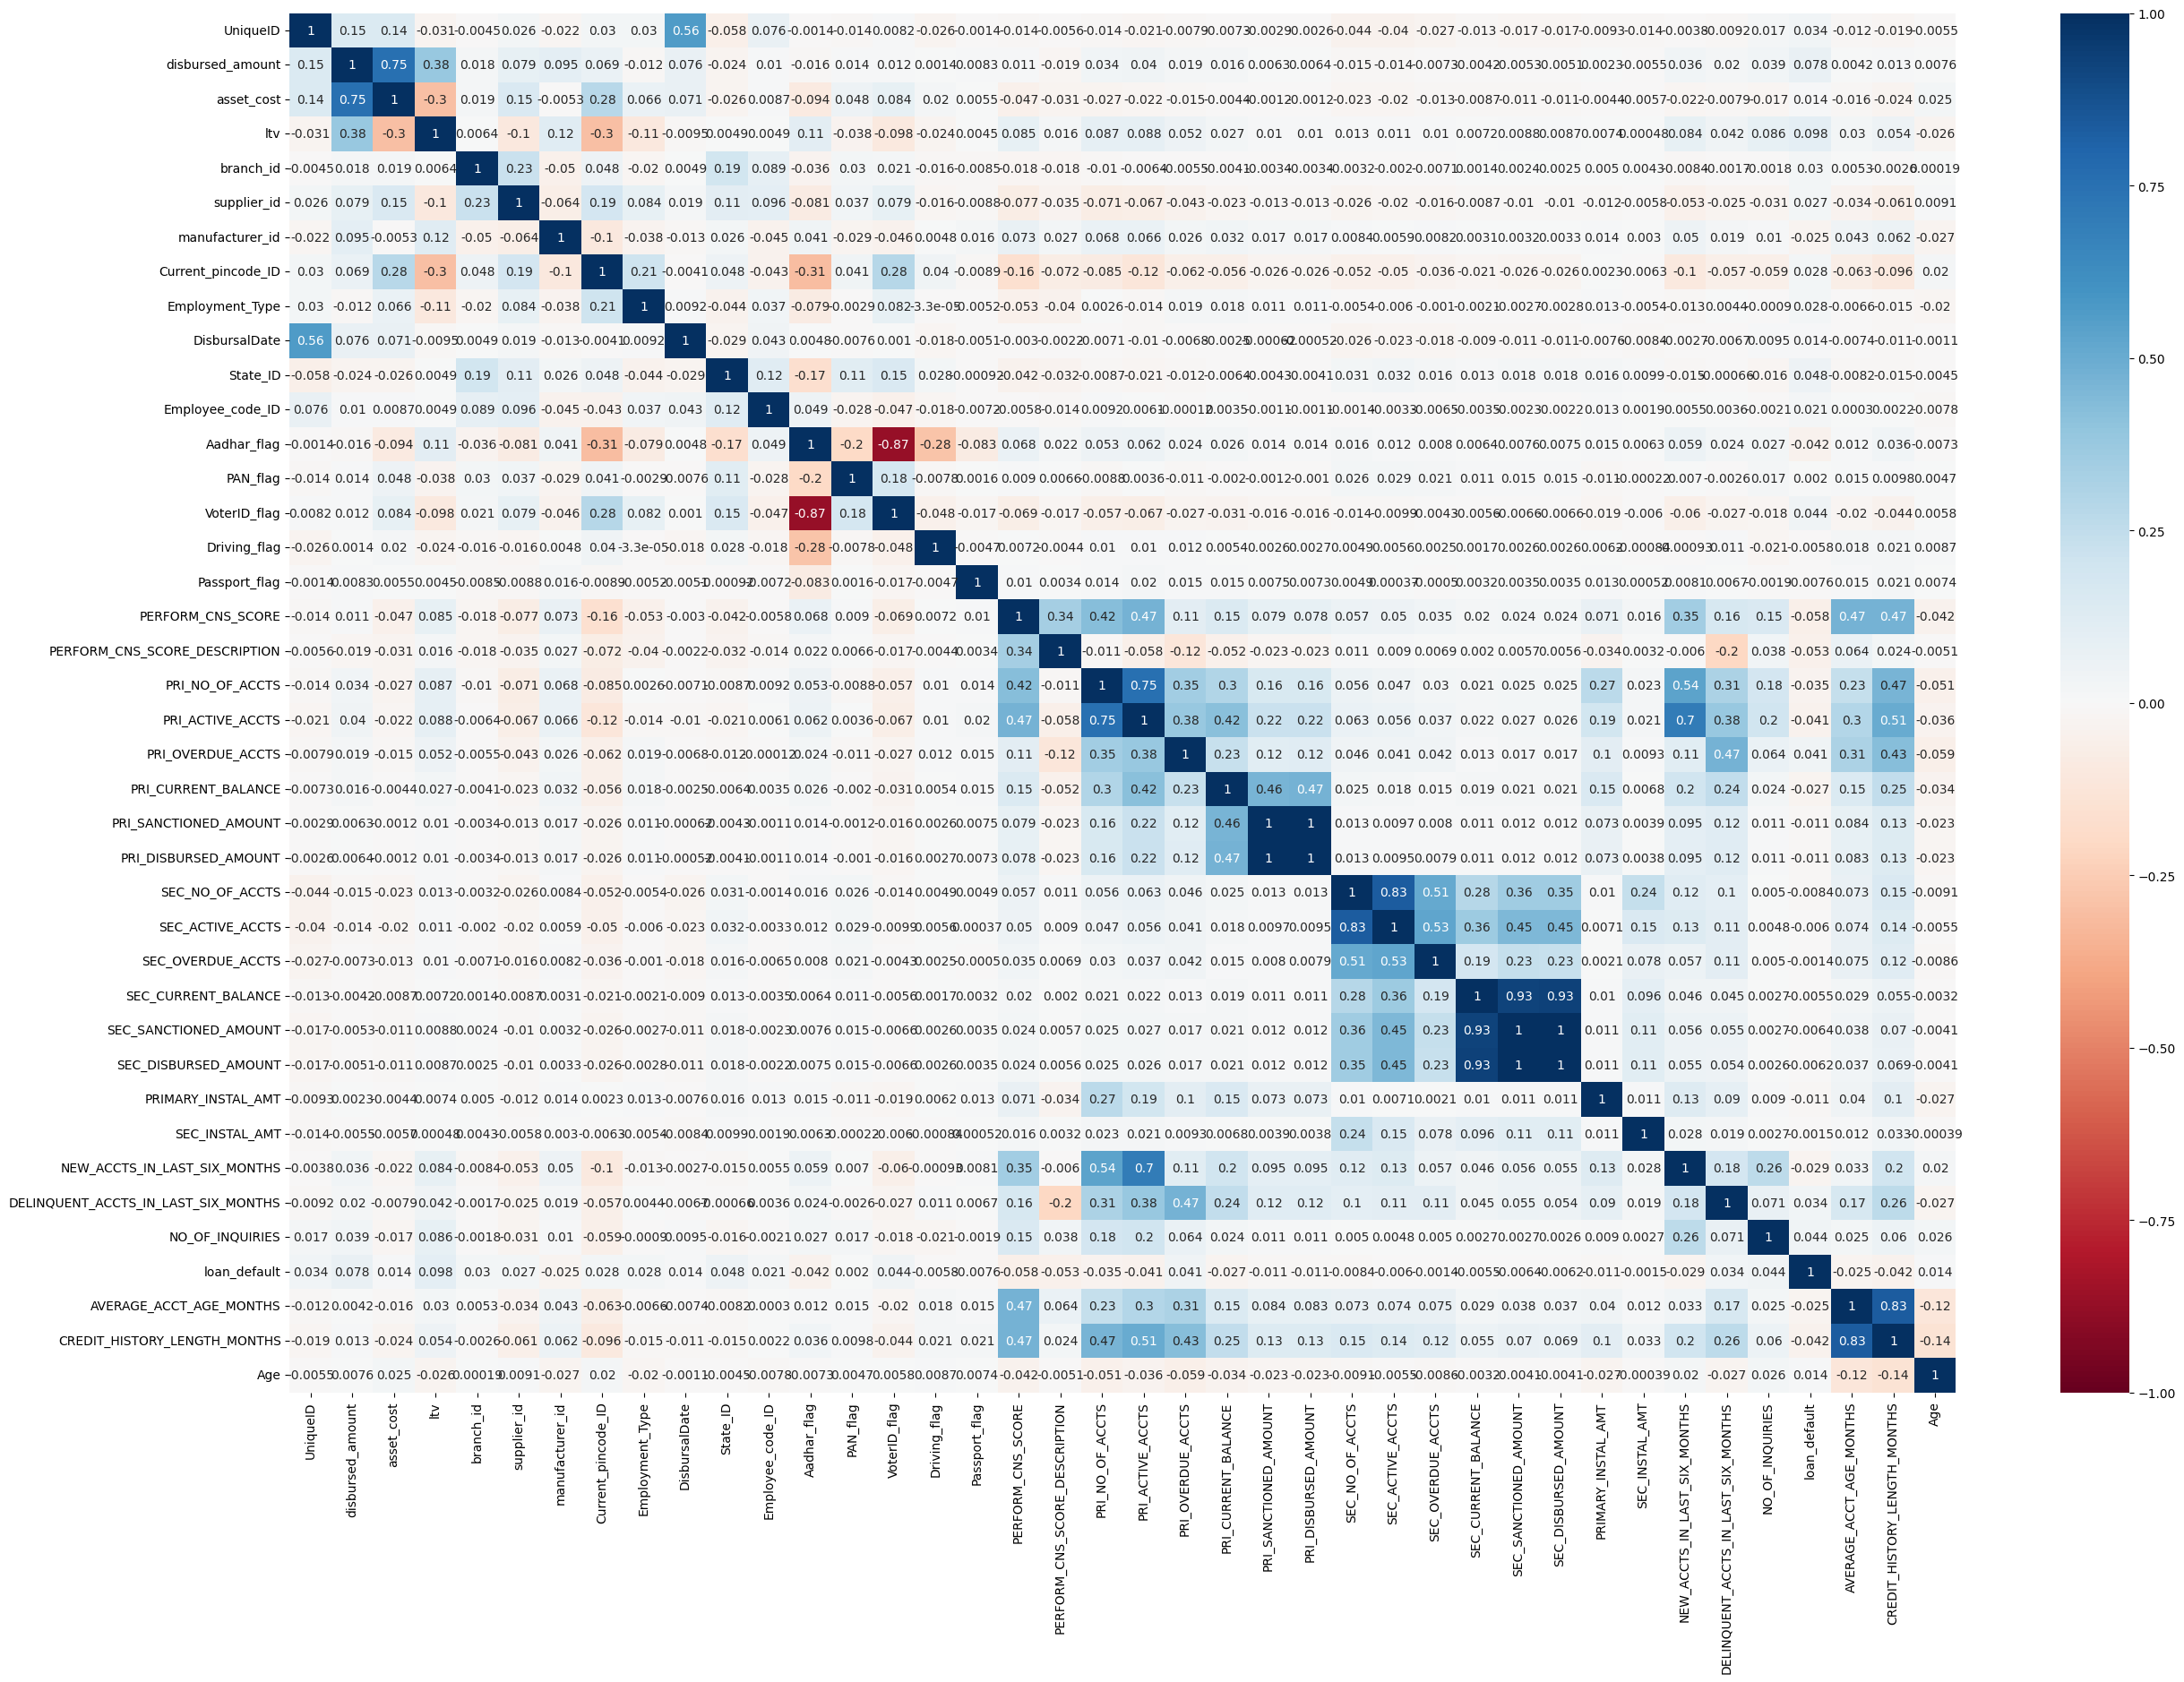

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot= True)
plt.show()

In [ ]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Employment_Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION               7
PRI_NO_OF_ACCTS                           108
PRI_ACTIVE_ACCTS                           40
PRI_OVERDUE_ACCTS                 

In [ ]:
df['NO_OF_INQUIRIES'].unique()

array([ 0,  1,  4,  2,  3,  5,  6, 12,  9,  8, 18,  7, 19, 11, 10, 15, 14,
       17, 20, 13, 23, 28, 16, 22, 36])

In [ ]:
df['loan_default'].value_counts(normalize = True)

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Employment_Type                      233154 non-null  int64         
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

In [40]:
X = df.drop(['loan_default','DisbursalDate','asset_cost','branch_id','manufacturer_id','Current_pincode_ID','Employment_Type','Employee_code_ID','VoterID_flag','Driving_flag','Passport_flag'], axis=1)
y = df['loan_default']

In [ ]:
X.head(5)

,UniqueID,disbursed_amount,ltv,supplier_id,State_ID,Aadhar_flag,PAN_flag,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,AVERAGE_ACCT_AGE_MONTHS,CREDIT_HISTORY_LENGTH_MONTHS,Age
0,420825,50578,89.55,22807,6,1,0,0,3,0,...,0,0,0,0,0,0,0,0,0,40
1,537409,47145,73.23,22807,6,1,0,598,2,1,...,0,0,1991,0,0,1,0,23,23,39
2,417566,53278,89.63,22807,6,1,0,0,3,0,...,0,0,0,0,0,0,0,0,0,38
3,624493,57513,88.48,22807,6,1,0,305,5,3,...,0,0,31,0,0,0,1,8,15,30
4,539055,52378,88.39,22807,6,1,0,0,3,0,...,0,0,0,0,0,0,1,0,0,46


In [41]:
X.info

<bound method DataFrame.info of         UniqueID  disbursed_amount    ltv  supplier_id Date_of_Birth  \
0         420825             50578  89.55        22807      01-01-84   
1         537409             47145  73.23        22807      31-07-85   
2         417566             53278  89.63        22807      24-08-85   
3         624493             57513  88.48        22807      30-12-93   
4         539055             52378  88.39        22807      09-12-77   
...          ...               ...    ...          ...           ...   
233149    626432             63213  60.72        20700      01-08-88   
233150    606141             73651  74.95        23775      05-12-88   
233151    613658             33484  48.45        22186      01-06-76   
233152    548084             34259  49.10        22186      26-03-94   
233153    630213             75751  66.81        22186      18-02-84   

        State_ID  MobileNo_Avl_Flag  Aadhar_flag  PAN_flag  PERFORM_CNS_SCORE  \
0              6                  1            1         0                  0   
1              6                  1            1         0                598   
2              6                  1            1         0                  0   
3              6                  1            1         0                305   
4              6                  1            1         0                  0   
...          ...                ...          ...       ...                ...   
233149         6                  1            0         0                735   
233150         6                  1            0         0                825   
233151         4                  1            1         0                  0   
233152         4                  1            1         0                  0   
233153         4                  1            1         0                  0   

        ... SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  \
0       ...                   0                      0                     0   
1       ...                   0                      0                     0   
2       ...                   0                      0                     0   
3       ...                   0                      0                     0   
4       ...                   0                      0                     0   
...     ...                 ...                    ...                   ...   
233149  ...                   0                      0                     0   
233150  ...                   0                      0                     0   
233151  ...                   0                      0                     0   
233152  ...                   0                      0                     0   
233153  ...                   0                      0                     0   

        PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                        0               0                             0   
1                     1991               0                             0   
2                        0               0                             0   
3                       31               0                             0   
4                        0               0                             0   
...                    ...             ...                           ...   
233149                4084               0                             0   
233150                1565               0                             0   
233151                   0               0                             0   
233152                   0               0                             0   
233153                   0               0                             0   

        DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  AVERAGE_ACCT_AGE  \
0                                         0         0yrs 0mon   
1                                         1        1yrs 11mon   
2                                         0         0yrs 0mon

In [ ]:
X.shape

(233154, 29)

In [ ]:
y

0         0
1         1
2         0
3         1
4         1
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 233154, dtype: int64

In [ ]:
# # Splitting
# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# # Defining models
# models = [
#     ('Logistic Regression', LogisticRegression( random_state = 42)),
#     ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
#     ('Random Forest', RandomForestClassifier(random_state = 42)),
#     ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
#     ('Support Vector Machine', SVC(probability=True)),
#     ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 5)),
#     ('XGBoost', XGBClassifier(random_state = 42)),
#     ('LightGBM', LGBMClassifier(random_state = 42)),
#     ('CatBoost', CatBoostClassifier(silent=True))
# ]

# # Initializing an empty list
# results_list = []

# # Evaluation
# for name, model in models:
#     model.fit(xtrain, ytrain)
#     y_pred = model.predict(xtest)
#     y_pred_proba = model.predict_proba(xtest)[:, 1]

#     accuracy = accuracy_score(ytest, y_pred)
#     precision = precision_score(ytest, y_pred)
#     recall = recall_score(ytest, y_pred)
#     balanced_acc = balanced_accuracy_score(ytest, y_pred)
#     roc_auc = roc_auc_score(ytest, y_pred_proba)
#     conf_matrix = confusion_matrix(ytest, y_pred)

#     results_list.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Balanced Accuracy': balanced_acc, 'ROC-AUC': roc_auc})

#     # Displaying the confusion matrix using ConfusionMatrixDisplay
#     disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
#     disp.plot(cmap=plt.cm.Blues)
#     plt.title(f'Confusion Matrix for {name}')
#     plt.show()

#     # Displaying the ROC curve using RocCurveDisplay
#     RocCurveDisplay.from_estimator(model, xtest, ytest)
#     plt.title(f'ROC Curve for {name}')
#     plt.show()

# results = pd.DataFrame(results_list)

In [ ]:
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Print resampled class distribution
print("Resampled class distribution:", Counter(y_res))

Resampled class distribution: Counter({0: 105, 1: 105})


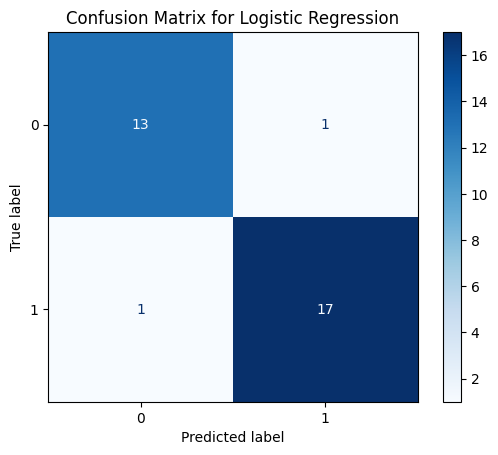

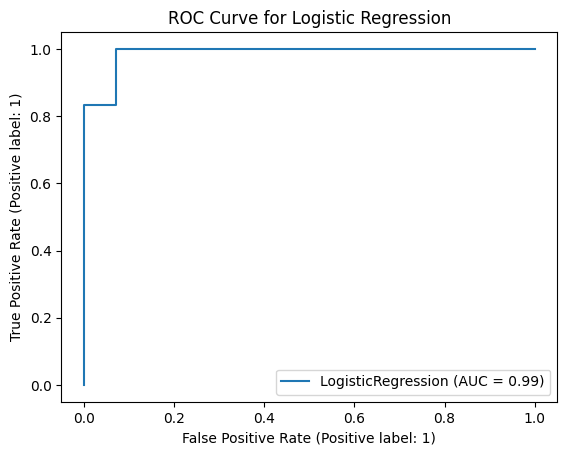

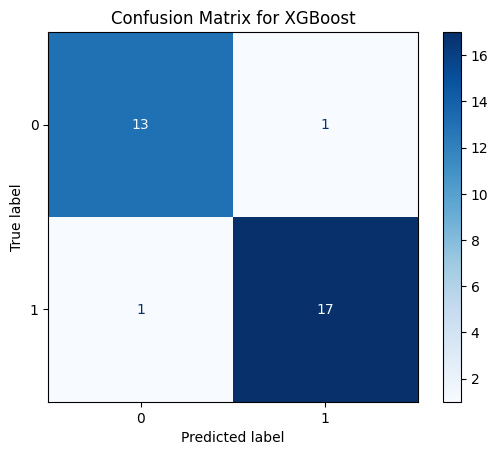

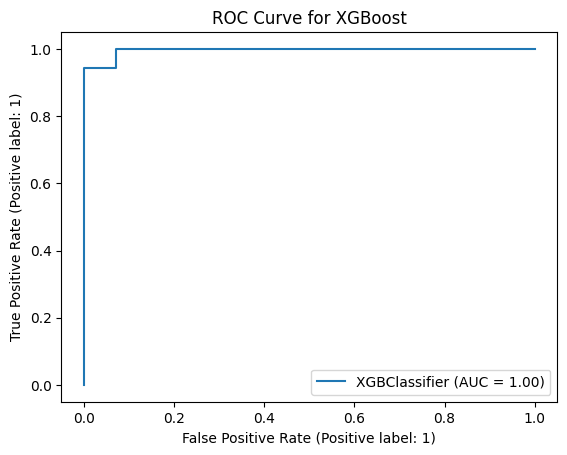

[LightGBM] [Info] Number of positive: 87, number of negative: 91
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488764 -> initscore=-0.044951
[LightGBM] [Info] Start training from score -0.044951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

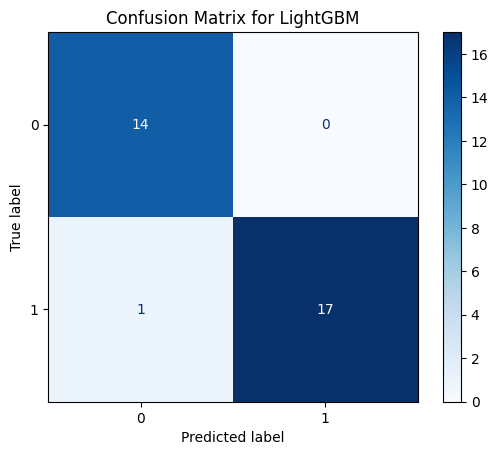

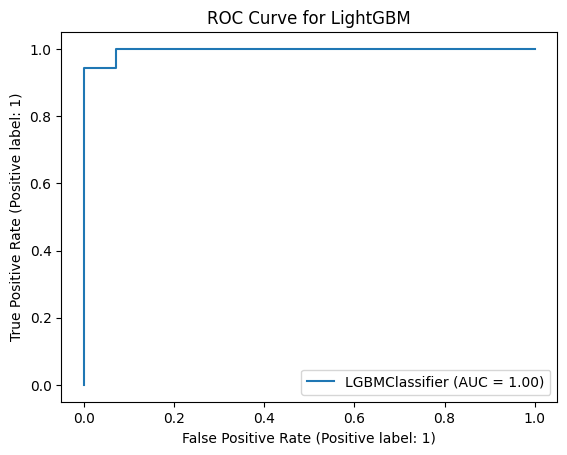

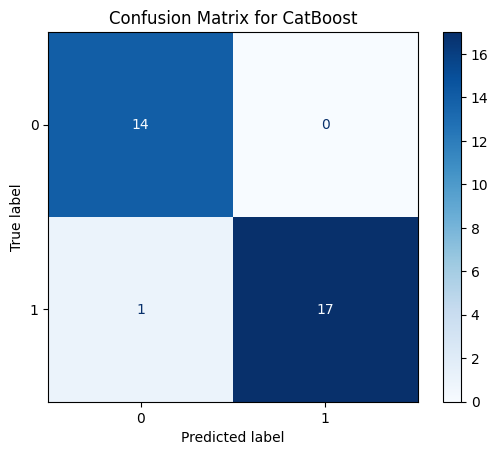

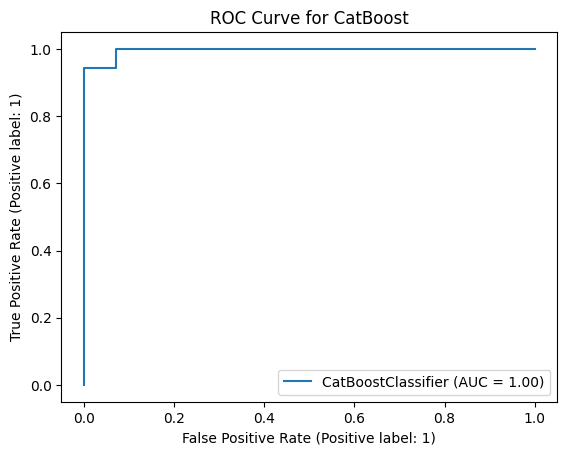

In [ ]:
# Splitting
xtrain, xtest, ytrain, ytest = train_test_split(X_res, y_res, test_size=0.15, random_state=42)

# Defining models
models = [
    ('Logistic Regression', LogisticRegression(random_state = 42)),
    # ('Decision Tree', DecisionTreeClassifier(random_state = 42)),
    # ('Random Forest', RandomForestClassifier(random_state = 42)),
    # ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
    # ('Support Vector Machine', SVC(probability=True)),
    # ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 5)),
    ('XGBoost', XGBClassifier(random_state = 42)),
    ('LightGBM', LGBMClassifier(random_state = 42)),
    ('CatBoost', CatBoostClassifier(silent=True))
]

# Initializing an empty list
results_list = []

# Evaluation
for name, model in models:
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  y_pred_proba = model.predict_proba(xtest)[:, 1]

  accuracy = accuracy_score(ytest, y_pred)
  precision = precision_score(ytest, y_pred)
  recall = recall_score(ytest, y_pred)
  balanced_acc = balanced_accuracy_score(ytest, y_pred)
  roc_auc = roc_auc_score(ytest, y_pred_proba)
  conf_matrix = confusion_matrix(ytest, y_pred)

  results_list.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Balanced Accuracy': balanced_acc, 'ROC-AUC': roc_auc})

  # Displaying the confusion matrix using ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
  disp.plot(cmap=plt.cm.Blues)
  plt.title(f'Confusion Matrix for {name}')
  plt.show()

  # Displaying the ROC curve using RocCurveDisplay
  RocCurveDisplay.from_estimator(model, xtest, ytest)
  plt.title(f'ROC Curve for {name}')
  plt.show()

results = pd.DataFrame(results_list)

In [ ]:
results

,Model,Accuracy,Precision,Recall,Balanced Accuracy,ROC-AUC
0,Logistic Regression,0.93750,0.944444,0.944444,0.936508,0.988095
1,XGBoost,0.93750,0.944444,0.944444,0.936508,0.996032
2,LightGBM,0.96875,1.000000,0.944444,0.972222,0.996032
3,CatBoost,0.96875,1.000000,0.944444,0.972222,0.996032
